# Lab 4: Support Vector Machines, Neural Networks and Convolutional Neural Networks

Using 13D Wine Dataset

In [1]:
from platform import python_version

print(python_version())

3.9.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

# Load Data

In [75]:
wineData = np.load('wineData.npy')
wineLabels = np.load('wineLabels.npy')


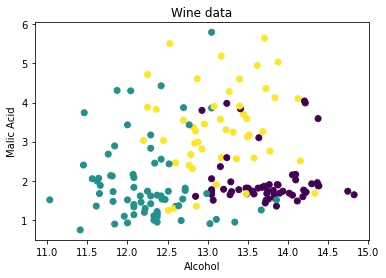

In [76]:

plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()


Split data into testing and training 80-20 split

In [77]:

wineData, wineLabels = shuffle(wineData, wineLabels, random_state=0) #make sure the samples are not ordered

trainData = wineData[ : int(len(wineData) * .8)]
testData = wineData[int(len(wineData) * .8) :]

trainLabels = wineLabels[ : int(len(wineLabels) * .8)]
testLabels = wineLabels[int(len(wineLabels) * .8) :]


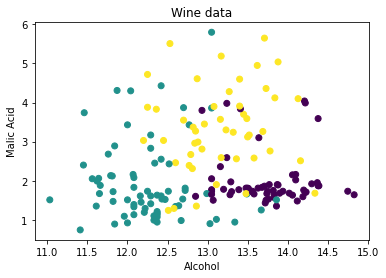

In [78]:
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

# Plot showing test/train split

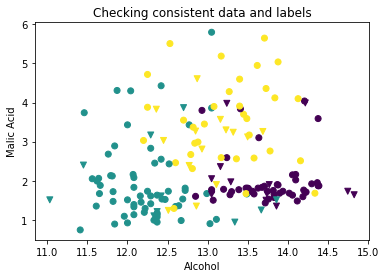

In [79]:
plt.figure()

plt.scatter(trainData[:,0], trainData[:,1], c=trainLabels, marker="o")
plt.scatter(testData[:,0], testData[:,1], c=testLabels, marker='v')
# Add title and axis names
plt.title('Checking consistent data and labels')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()

# Task 4.1 - Multiclass SVM for Wine Data

### Use standardScalr to standardise the class

In [80]:
scaler = StandardScaler()
scaler.fit(trainData)
print(scaler.mean_)
trainData = scaler.transform(trainData)
testData = scaler.transform(testData)

[1.29742958e+01 2.32809859e+00 2.34718310e+00 1.94823944e+01
 9.93450704e+01 2.28725352e+00 2.05478873e+00 3.52535211e-01
 1.60535211e+00 4.98908451e+00 9.59126761e-01 2.66676056e+00
 7.46887324e+02]


### create and train a multiclass svm

In [88]:
svc = SVC(C = 2.0, kernel='sigmoid')
svc.fit(trainData, trainLabels)

SVC(C=2.0, kernel='sigmoid')

### Predict test data and find accuracy

In [89]:
testPredicted = svc.predict(testData)
svc.score(testData, testLabels)

0.9722222222222222

### Visualise test data in scatter plot, colour the ground truth values and draw a scatter plot to visualise test data with predicted class values coloured

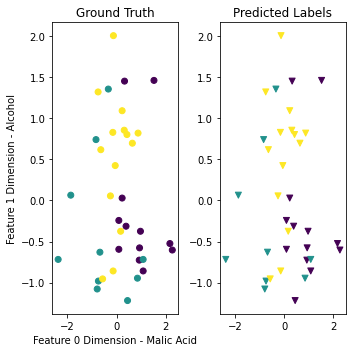

In [90]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].set_title('Ground Truth')
axes[0].set_ylabel('Feature 1 Dimension - Alcohol')
axes[0].set_xlabel('Feature 0 Dimension - Malic Acid')

axes[1].set_title('Predicted Labels')

axes[0].scatter(testData[:,0], testData[:,1], c=testLabels, marker="o")
axes[1].scatter(testData[:,0], testData[:,1], c=testPredicted, marker='v')
fig.tight_layout()




# 4.2 - Neural Network for Wine Data